In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


### Exploratory Data Analysis (EDA)
----

Exploratory Data Analysis (EDA) is the process of analyzing datasets with the aim of understanding them more deeply. As the term “exploratory” suggests, during EDA the focus is to explore or understand the data better.

Some of the common practices in EDA are:

* Looking at the data types of the variables
* Identifying the most important variables
* Looking at the distributions of the variables
* Summarizing the data
* Finding biases in the data
* Looking at the different trends in data
* Studying relationships among quantities
* Spotting anomalies in the data
* Visualizing the data

### Summary Stats
----
Let's first summarize the dataset.

In [2]:
df = pd.read_csv('/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')
display(df.head(5))

#summarize stats
print(df[['EDUCATION','AGE']].describe())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


          EDUCATION           AGE
count  30000.000000  30000.000000
mean       1.853133     35.485500
std        0.790349      9.217904
min        0.000000     21.000000
25%        1.000000     28.000000
50%        2.000000     34.000000
75%        2.000000     41.000000
max        6.000000     79.000000


By looking at the output we can find out that : 

1. average age is 35 
2. 50% of age is at 28 which means 50% of people in the dataset are below 28
3. 75% aducation is 2 which means 75% people if the dataset have been no university

### Categorical Variable
-----
By look at the dataset we can see three important categorical variables EDUCATION, SEX, and MARRIAGE, let's explore them. 

value counts of gender : 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
value counts of gender : 2    18112
1    11888
Name: SEX, dtype: int64
value counts of gender : 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


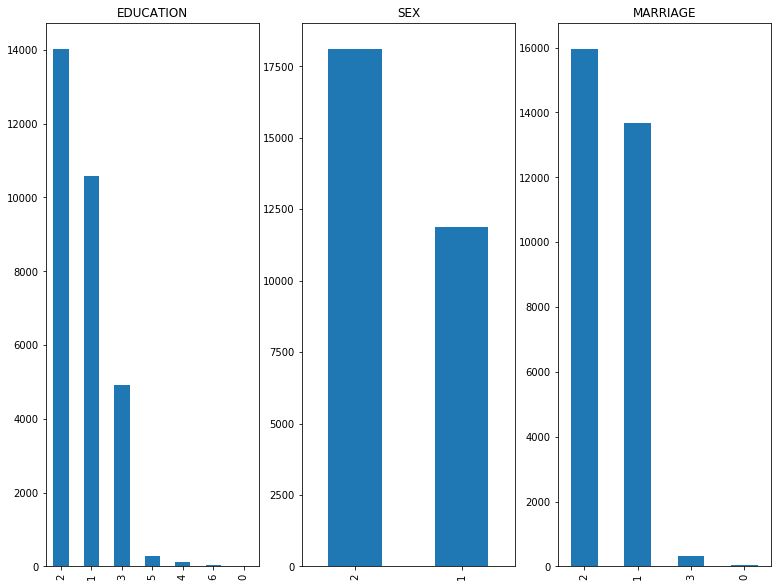

In [3]:
import matplotlib.pyplot as plt 

print('value counts of gender :', df['EDUCATION'].value_counts())
print('value counts of gender :', df['SEX'].value_counts())
print('value counts of gender :', df['MARRIAGE'].value_counts())

fig, plots = plt.subplots(1,3, figsize=(13,10))

df['EDUCATION'].value_counts().plot(kind='bar',ax=plots[0], title='EDUCATION')
df['SEX'].value_counts().plot(kind='bar',ax=plots[1], title='SEX')
df['MARRIAGE'].value_counts().plot(kind='bar',ax=plots[2], title='MARRIAGE')
plt.show()

first we created a subplots of 1 ros and 3 columns and figuresize (13,10), the fuction return a tuple of figure and axes. 
we later use the axes to plot 3 different bar plot in a single figure. 

### Distributions
----
Looking at the distributions of the variables can be very helpful and can give us key insights.
we will plot a histogram of AGE variable to find out how the AGE of people are distributed.

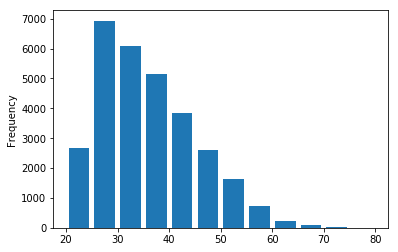

In [4]:
cbins = [20,25,30,35,40,45,50,55,60,65,70,75,80]
df['AGE'].plot(kind='hist', bins=cbins, rwidth=0.8)
plt.show()

we can see here the majority number of people lies in between 20 to 40. 